In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [0]:
import os

In [0]:
#Creating db file from csv
if not os.path.isfile('Quora/train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('Quora/final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [0]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [37]:
read_db = 'Quora/train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [0]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [0]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [0]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,344_y,345_y,346_y,347_y,348_y,349_y,350_y,351_y,352_y,353_y,354_y,355_y,356_y,357_y,358_y,359_y,360_y,361_y,362_y,363_y,364_y,365_y,366_y,367_y,368_y,369_y,370_y,371_y,372_y,373_y,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.749981250468738,0.599988000239995,0.833319444675922,0.624992187597655,0.727266115762584,0.666661111157407,0.0,1.0,1.0,11.5,85,82,74,73,0.433962264150943,1,1,51,53,11,11,6.0,22.0,0.272727272727273,2,0,-12.2556228041649,0.175713539123535,-12.03167341277,105.144570827484,44.2918691635132,-29.6221098303795,-56.1524509042502,12.4535479545593,34.7768138423562,-38.7762278318405,12.8080533146858,-28.4891222119331,44.2105245478451,-24.2540059089661,...,-18.8600490614772,-7.22857287526131,-19.7291898727417,20.4163512587547,13.0882124304771,5.06333315372467,-9.74148488044739,12.6344024483114,-14.5359828919172,-3.84876118600368,1.23040024191141,-21.0539293810725,-20.4626219272614,-21.3927896767855,-0.77587254345417,-29.6342569589615,-2.39633840508759,19.9958621412516,11.4579360447824,-1.40515015053097,-34.2546127438545,-13.9259336590767,-5.58024681685492,-1.50447586923838,25.0503144264221,12.1317357718945,-11.92352521047,4.46022483706474,-8.51223829016089,3.15039286017418,18.4770556241274,12.5430152490735,-2.3954147323966,-1.70077792182565,4.15024966001511,7.55368234030902,-5.8275599766057,4.18760818243027,10.9026665687561,5.53877446055412
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,11.0,29,29,32,47,0.0810810810810811,1,1,103,36,17,5,0.0,20.0,0.0,2,0,121.597038924694,81.5979457180947,67.3157972097397,126.728616714478,-59.9135279655456,-63.9164581298828,-45.7109177410603,-115.588286876678,78.09751111269,6.9373374581337,-25.0920787528157,-48.1388934850693,57.3446592986584,-35.4448975920677,...,0.947933629155159,-5.17950683832169,-4.02691966295242,-6.17150682210922,-21.5249780118465,16.3867664337158,-16.5739080905914,-3.70622438192368,-8.23810964822769,0.62374684214592,11.5364654660225,21.3927100002766,-14.0150089263916,-11.8176661729813,9.89120600372553,-3.02570715826005,-9.08649569749832,-5.30846004933119,6.66075025312603,7.32037514448166,1.63310462236404,-8.28857535123825,13.4083560705185,22.367701292038,-6.45373518764973,14.6005020141602,-8.95277953147888,12.4398056045175,1.28368708491325,-5.47851601243019,-13.944325119257,10.1500548571348,-1.02161026000977,-1.11157341301441,2.07520091533661,-16.3925267159939,5.91019076108933,6.40567708015442,19.9357253909111,-10.5228285491467
3,0.499991666805553,0.499991666805553,0.333327777870369,0.333327777870369,0.416663194473379,0.416663194473379,0.0,0.0,0.0,12.0,61,56,51,54,0.145161290322581,1,1,61,63,12,11,3.0,23.0,0.130434782608696,2,0,12.6544984579086,46.7512268200517,54.3588524460793,80.9719638824463,-62.5990650057793,26.4019985198975,-130.567031420767,-66.591844946146,104.575965046883,-45.6105242967606,-43.0957516878843,14.2969244867563,5.85273671150208,-39.1441594362259,...,-6.34467080235481,3.14408540725708,-40.4463044824079,21.1264198422432,36.5435436069965,-16.5137037783861,0.368370085954666,4.82858142256737,-12.8773099780083,14.0007566772401,2.32554921507835,-20.2546317875385,-0.810799527913332,-23.1043943911791,-0.390299126505852,-20.178652971983,-11.6918787714094,38.7074849456549,0.643282995559275,5.55679347738624,-30.3500145971775,-9.3061109483242,5.49329307675362,-18.2033499330282,29.2679373547435,17.2721195071936,-8.69965760409832,5.66049228236079,-11.4295339044184,-8.74053502827883,-3.51657012104988,27.0224091187119,21.6034498512745,-2.93132730200887,1.44560090638697,-1.87379903672263,-13.1615327373147,2.64219984412193,17.6970096521545,1.76001632213593
4,0.999975000624984,0.799984000319994,0.6249921

<h2> 4.2 Converting strings to numerics </h2>

In [0]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [0]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h2> 4.3 Random train test split( 70:30) </h2>

In [0]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [0]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 794)
Number of data points in test data : (30000, 794)


In [0]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6330857142857143 Class 1:  0.3669142857142857
---------- Distribution of output variable in train data ----------
Class 0:  0.36693333333333333 Class 1:  0.36693333333333333


In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8913124204874303


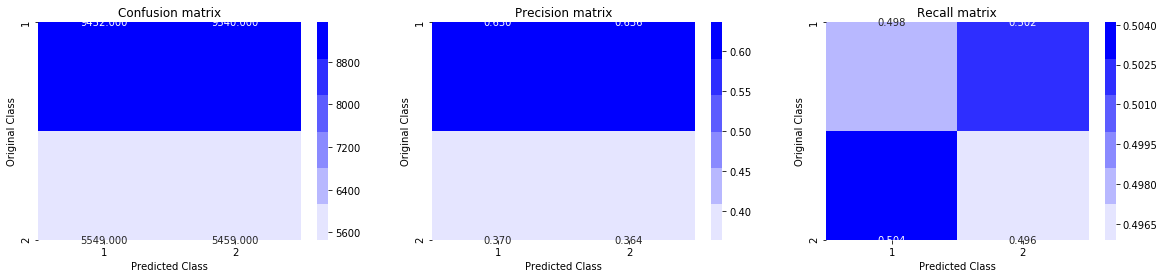

In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.6590088823008615
For values of alpha =  0.0001 The log loss is: 0.4651504759119351
For values of alpha =  0.001 The log loss is: 0.46315322183816376
For values of alpha =  0.01 The log loss is: 0.49118624271412314
For values of alpha =  0.1 The log loss is: 0.4541760157156937
For values of alpha =  1 The log loss is: 0.47532071098189277
For values of alpha =  10 The log loss is: 0.5142369430998964


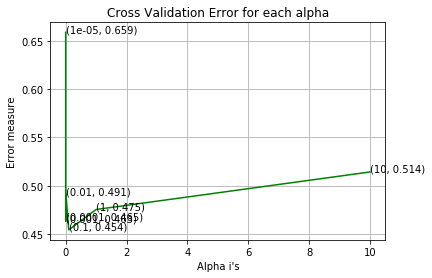

For values of best alpha =  0.1 The train log loss is: 0.44387313274681317
For values of best alpha =  0.1 The test log loss is: 0.4541760157156937
Total number of data points : 30000


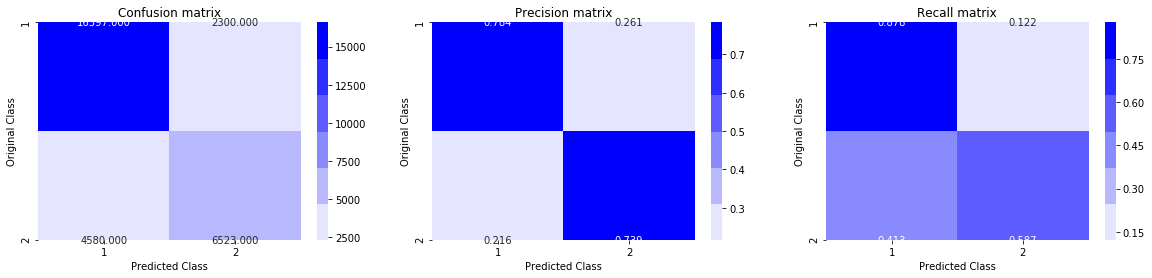

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.6590088823008615
For values of alpha =  0.0001 The log loss is: 0.6590088823008615
For values of alpha =  0.001 The log loss is: 0.6590088823008615
For values of alpha =  0.01 The log loss is: 0.6590088823008615
For values of alpha =  0.1 The log loss is: 0.6590088823008615
For values of alpha =  1 The log loss is: 0.6282544209648048
For values of alpha =  10 The log loss is: 0.6545352066543368


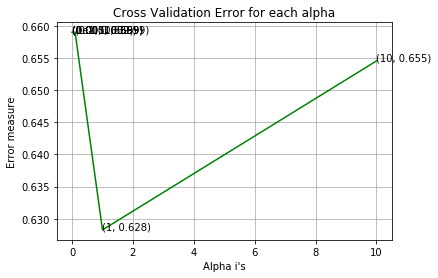

For values of best alpha =  1 The train log loss is: 0.6290317900094735
For values of best alpha =  1 The test log loss is: 0.6282544209648048
Total number of data points : 30000


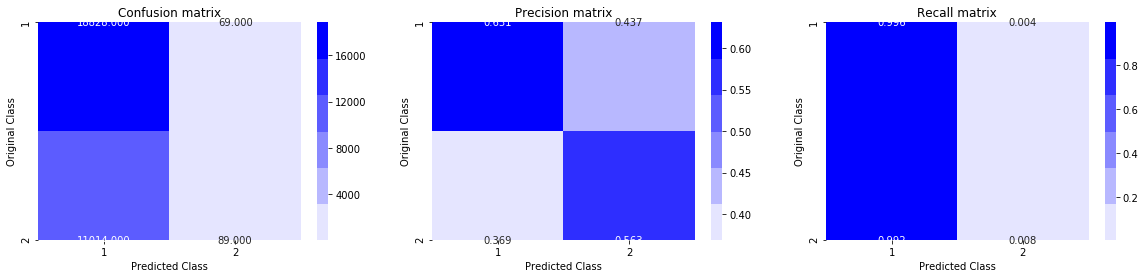

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [0]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684823	valid-logloss:0.684868
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.615177	valid-logloss:0.615789
[20]	train-logloss:0.564106	valid-logloss:0.565148
[30]	train-logloss:0.525468	valid-logloss:0.526875
[40]	train-logloss:0.495816	valid-logloss:0.497425
[50]	train-logloss:0.472475	valid-logloss:0.474235
[60]	train-logloss:0.454237	valid-logloss:0.456248
[70]	train-logloss:0.439451	valid-logloss:0.441755
[80]	train-logloss:0.427301	valid-logloss:0.429771
[90]	train-logloss:0.417757	valid-logloss:0.420442
[100]	train-logloss:0.40965	valid-logloss:0.412456
[110]	train-logloss:0.402834	valid-logloss:0.405848
[120]	train-logloss:0.397128	valid-logloss:0.400366
[130]	train-logloss:0.392339	valid-logloss:0.395784
[140]	train-logloss:0.388492	valid-logloss:0.392155
[150]	train-logloss:0.384839	valid-logloss:0.388657
[160]	train-logloss:0.381794	

Total number of data points : 30000


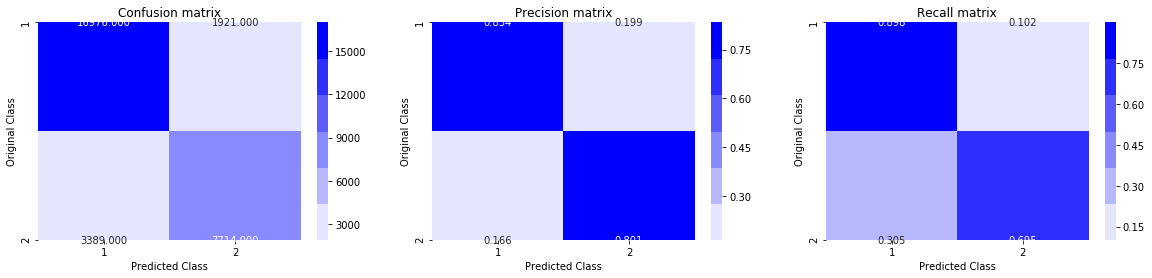

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


## TFIDF Feature

In [0]:
#nlp_features_train.csv (NLP Features)
if os.path.isfile('Quora/nlp_features_train.csv'):
    dfnlp = pd.read_csv("Quora/nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('Quora/df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("Quora/df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [0]:
# dropping only qid1, qid1 from the advanced features
df1 = dfnlp.drop(['qid1','qid2',],axis=1)
# dropping only qid1 , qid2, question1, question2 from the advanced features
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

# so finaldf_all = 19columns(df1) + 12columns(df2) = 31 columns

In [0]:
df1.head(2)

,id,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [0]:
df2.head(2)

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [0]:
# joining advancedfeatures(df1) and normalfeatures(df2) taking index in common id
finaldf_all = df1.join(df2.set_index('id'), on='id')

In [0]:
finaldf_all.shape

(404290, 30)

In [0]:
finaldf_all.head(2)

,id,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [0]:
finaldf_all['question1'] = finaldf_all['question1'].apply(lambda x: str(x))
finaldf_all['question2'] = finaldf_all['question2'].apply(lambda x: str(x))

In [0]:
# Sampling 100k data points for the model
finaldf_100k = finaldf_all.sample(n=100000,random_state = 1)
print(finaldf_100k.shape)

(100000, 30)


In [0]:
# taking actual label from dataset(100k)
y_true = finaldf_100k['is_duplicate']

In [0]:
# randomly sampling 70% to train and 30% to test dataset
X_train,X_test, y_train, y_test = train_test_split(finaldf_100k, y_true, stratify=y_true, test_size=0.3)

## TFIDF

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# storing length of actual label from train and test dataset
test_len = len(y_test)
train_len = len(y_train)

In [0]:
# converting our test and train data questions 1 into tfidf vec
tfidf_vectorizer_qs1 = TfidfVectorizer(lowercase=False)
tfidf_qs1_train = tfidf_vectorizer_qs1.fit_transform(X_train['question1'])
tfidf_qs1_test  = tfidf_vectorizer_qs1.transform(X_test['question1'])

print(tfidf_qs1_train.shape)
print(tfidf_qs1_test.shape)

(70000, 31004)
(30000, 31004)


In [0]:
# converting our test and train data questions 2 into tfidf vec
tfidf_vectorizer_qs2 = TfidfVectorizer(lowercase=False)
tfidf_qs2_train = tfidf_vectorizer_qs2.fit_transform(X_train['question2'])
tfidf_qs2_test  = tfidf_vectorizer_qs2.transform(X_test['question2'])

print(tfidf_qs2_train.shape)
print(tfidf_qs2_test.shape)

(70000, 29039)
(30000, 29039)


In [0]:
#Combining the two dataframe

train_tfidf = hstack((tfidf_qs1_train,tfidf_qs2_train))
test_tfidf = hstack((tfidf_qs1_test,tfidf_qs2_test))

print("train data shape",train_tfidf.shape)
print("Test data shape ",test_tfidf.shape)

train data shape (70000, 60043)
Test data shape  (30000, 60043)


In [0]:
X_train.head(1)

,id,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
56942,56942,what are the best ways for passing time during...,what are some ways to pass time during boring ...,1,0.599988,0.499992,0.599988,0.599988,0.599994,0.54545,0.0,1.0,1.0,10.5,75,68,78,78,0.363636,4,1,63,54,11,10,6.0,21.0,0.285714,5,3


In [0]:
# Dropping id and questions from the dataset after tfidf vectorizing the data
train_feature_df = X_train.drop(['id','question1','question2','is_duplicate'], axis=1, inplace=False)
test_feature_df = X_test.drop(['id','question1','question2','is_duplicate'], axis=1, inplace=False)

In [0]:
train_feature_df.head(1)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
56942,0.599988,0.499992,0.599988,0.599988,0.599994,0.54545,0.0,1.0,1.0,10.5,75,68,78,78,0.363636,4,1,63,54,11,10,6.0,21.0,0.285714,5,3


In [0]:
print(type(train_tfidf))
print(type(test_tfidf))

<class 'scipy.sparse.coo.coo_matrix'>
<class 'scipy.sparse.coo.coo_matrix'>


In [0]:
# since both the data is sparse matrix to we need to convert the dataframe to sparse before combining them
import scipy
train_sparse = scipy.sparse.csr_matrix(train_feature_df)
test_sparse = scipy.sparse.csr_matrix(test_feature_df)

print("TRAIN data Shape = ",train_sparse.shape," Type is",type(train_sparse))
print("TEST data shape = ",test_sparse.shape, " Type is", type(test_sparse))

TRAIN data Shape =  (70000, 26)  Type is <class 'scipy.sparse.csr.csr_matrix'>
TEST data shape =  (30000, 26)  Type is <class 'scipy.sparse.csr.csr_matrix'>


In [0]:
# Combining tfidf features of question 1 and question 2 to the original test and train dataset
train_data_final = hstack((train_tfidf,train_sparse))
test_data_final = hstack((test_tfidf,test_sparse))

print("train data shape",train_data_final.shape)
print("Test data shape ",test_data_final.shape)

train data shape (70000, 60069)
Test data shape  (30000, 60069)


In [0]:
scaler = StandardScaler(with_mean=False)
standardized_data_train = scaler.fit_transform(train_data_final)
standardized_data_test = scaler.transform(test_data_final)

print("train data shape",standardized_data_train.shape)
print("Test data shape ",standardized_data_test.shape)

train data shape (70000, 60069)
Test data shape  (30000, 60069)


In [0]:
X_train = standardized_data_train
X_test = standardized_data_test

## Logistic Regression

For values of alpha =  1e-05 The log loss is: 0.566998893974907
For values of alpha =  0.0001 The log loss is: 0.5694428306768418
For values of alpha =  0.001 The log loss is: 0.545024717898796
For values of alpha =  0.01 The log loss is: 0.49986564086795404
For values of alpha =  0.1 The log loss is: 0.4625312509498126
For values of alpha =  1 The log loss is: 0.456833942091159
For values of alpha =  10 The log loss is: 0.4656292591942041


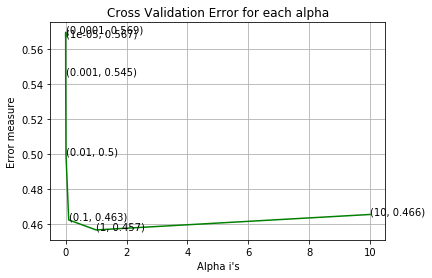

For values of best alpha =  1 The train log loss is: 0.33190088730471434
For values of best alpha =  1 The test log loss is: 0.456833942091159
Total number of data points : 30000


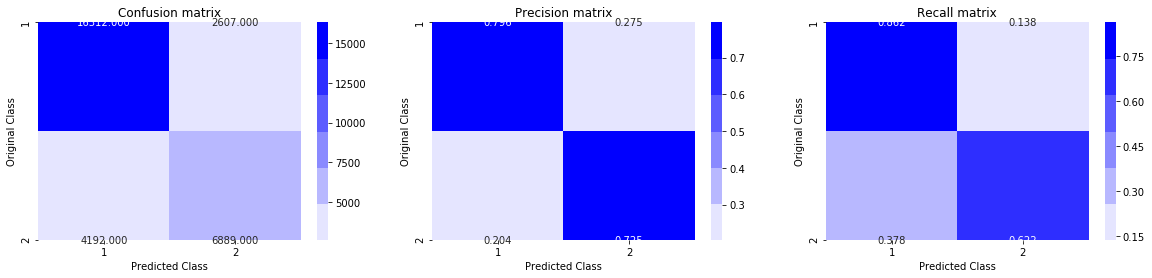

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=1,class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=1,class_weight='balanced')
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## Linear SVM

For values of alpha =  1e-05 The log loss is: 0.6586177514104066
For values of alpha =  0.0001 The log loss is: 0.6586177514104066
For values of alpha =  0.001 The log loss is: 0.6586177514104066
For values of alpha =  0.01 The log loss is: 0.6586177514104066
For values of alpha =  0.1 The log loss is: 0.6584066520829768
For values of alpha =  1 The log loss is: 0.6585216118390109
For values of alpha =  10 The log loss is: 0.6585934323140507


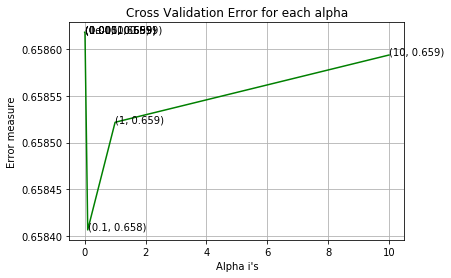

For values of best alpha =  0.1 The train log loss is: 0.6583917657563423
For values of best alpha =  0.1 The test log loss is: 0.6584066520829768
Total number of data points : 30000


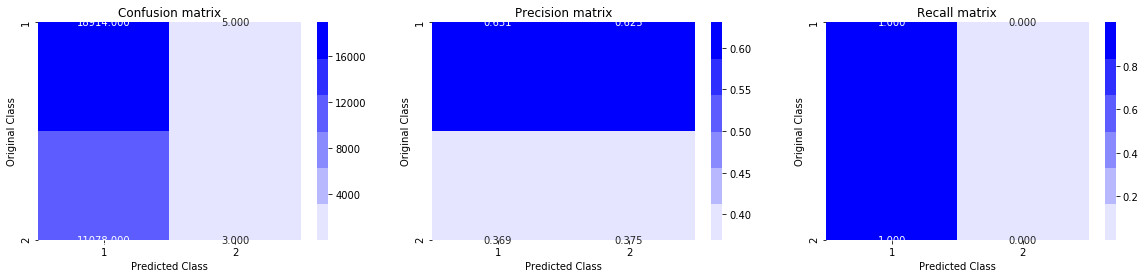

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=1,class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=1,class_weight='balanced')
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

## XGBOOST with Hyperparameter tuning

In [0]:
import xgboost as xgb

In [0]:
n_estimators = [50,100,150,200,300,400,500]
test_scores = []
train_scores = []
for i in n_estimators:
    clf = xgb.XGBClassifier(learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, y_pred, eps=1e-15)
    train_scores.append(log_loss_train)
    y_pred = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, y_pred, eps=1e-15)
    test_scores.append(log_loss_test)
    print('For n_estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)

For n_estimators =  50 Train Log Loss  0.37776845560689853 Test Log Loss  0.3814010509262482
For n_estimators =  100 Train Log Loss  0.3572491313563236 Test Log Loss  0.3632610291531397
For n_estimators =  150 Train Log Loss  0.3455091178805006 Test Log Loss  0.3535609471881418
For n_estimators =  200 Train Log Loss  0.3377292008635845 Test Log Loss  0.34810381124947937
For n_estimators =  300 Train Log Loss  0.3272940655662297 Test Log Loss  0.34207568189851423
For n_estimators =  400 Train Log Loss  0.3196578887048417 Test Log Loss  0.33817445826356435
For n_estimators =  500 Train Log Loss  0.3135746392374123 Test Log Loss  0.3358988578589735


The test log loss is: 0.3358988578589735


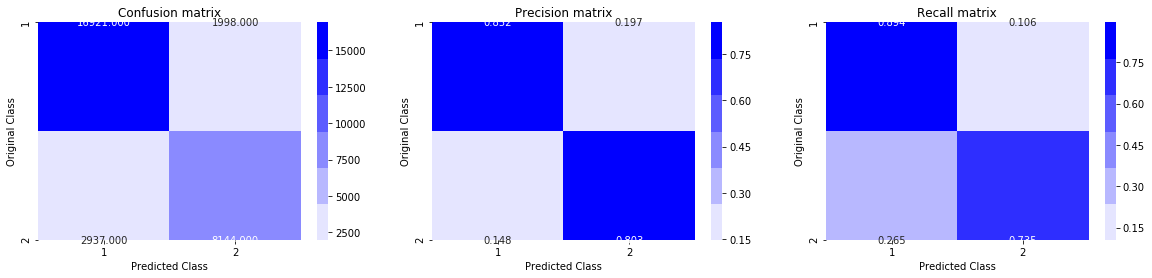

In [0]:
clf=xgb.XGBClassifier(learning_rate=0.1,n_estimators=500,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred=clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, y_pred, eps=1e-15))
predicted_y =np.argmax(y_pred,axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

In [5]:
# avoid decoding problems
df = pd.read_csv("Quora/train.csv")# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [0]:
dfnlp = pd.read_csv("Quora/nlp_features_train.csv",encoding='latin-1')
dfppro = pd.read_csv("Quora/df_fe_without_preprocessing_train.csv",encoding='latin-1')
df1 = dfnlp.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = dfnlp[['id','question1','question2']]
duplicate = dfnlp.is_duplicate

In [7]:
df1.shape

(404290, 16)

In [8]:
df2.shape

(404290, 12)

In [9]:
df3.shape

(404290, 3)

In [0]:
df3 = df3.fillna(' ')
#assigning new dataframe with columns question(q1+q2) and id same as df3
new_df = pd.DataFrame()
new_df['questions'] = df3.question1 + ' ' + df3.question2
new_df['id'] = df3.id
df2['id']=df1['id']
new_df['id']=df1['id']
final_df = df1.merge(df2, on='id',how='left') #merging df1 and df2
X  = final_df.merge(new_df, on='id',how='left')#merging final_df and new_df

In [0]:
X=X[:100000]

In [12]:
X=X.drop('id',axis=1)
X.columns

Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', 'questions'],
      dtype='object')

In [0]:
duplicate=duplicate[:100000]

In [0]:
Y=np.array(duplicate)

In [15]:
Y.shape

(100000,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0,stratify=Y)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(70000, 27)
(70000,)
(30000, 27)
(30000,)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(X_train['questions'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [0]:
nlp = spacy.load('en_core_web_sm')

In [20]:
vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_train['questions'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1),len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
#df['q1_feats_m'] = list(vecs1)

100%|██████████| 70000/70000 [12:51<00:00, 90.73it/s]


In [21]:
vecs2 = []
for qu2 in tqdm(list(X_test['questions'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), 96])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
#df['q2_feats_m'] = list(vecs2)ora/final_features.csv",nrows=100001)

100%|██████████| 30000/30000 [05:28<00:00, 91.21it/s]


In [0]:
first_df=pd.DataFrame(vecs1)
second_df=pd.DataFrame(vecs2)

In [0]:

X_train=X_train.drop('questions',axis=1)
X_test=X_test.drop('questions',axis=1)

In [24]:
X_train.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
20946,0.333328,0.333328,0.000000,0.000000,0.199998,0.181817,0.0,0.0,1.0,10.5,51,40,38,39,0.163636,1,1,54,59,11,10,1.0,21.0,0.047619,2,0
279,0.999950,0.499988,0.499975,0.333322,0.599988,0.499992,0.0,1.0,1.0,5.5,84,70,67,83,0.541667,1,1,23,33,5,6,2.0,11.0,0.181818,2,0
74424,0.749981,0.499992,0.999983,0.857131,0.818174,0.599996,0.0,1.0,4.0,13.0,94,75,80,92,0.757576,1,1,65,92,10,15,9.0,23.0,0.391304,2,0
87566,0.499992,0.499992,0.714276,0.624992,0.615380,0.571424,0.0,0.0,1.0,13.5,79,73,50,53,0.304348,1,1,66,73,12,13,7.0,25.0,0.280000,2,0
89750,0.999967,0.749981,0.999967,0.599988,0.999983,0.599994,0.0,1.0,4.0,8.0,100,78,78,80,0.709677,1,4,46,30,10,6,5.0,15.0,0.333333,5,3


In [25]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier,DMatrix
from sklearn.model_selection import RandomizedSearchCV
max_depth =  [1,3,5,7,9]
base_learners =  [250, 300, 350, 400, 450, 500]
learning_rate = [0.1, 0.2, 0.3, 0.4]
gamma = [1,2,3,4]
parameters = { 'max_depth' : max_depth, 'n_estimators' : base_learners, 'learning_rate' : learning_rate, 'gamma' : gamma} 

clf = XGBClassifier(random_state=0, subsample=0.7, n_jobs=-1)
randomCV = RandomizedSearchCV(clf, parameters, cv = 5, scoring='neg_log_loss', n_jobs=-1)
randomCV.fit(X_train, y_train)

print("Best Estimator: ", randomCV.best_estimator_) 
print("Best param: ", randomCV.best_params_)
print("Best Score: ", randomCV.best_score_)

best_depth = randomCV.best_params_['max_depth']
best_base_learner = randomCV.best_params_['n_estimators']
best_learning_rate = randomCV.best_params_['learning_rate']
best_gamma = randomCV.best_params_['gamma']

Best Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=4,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)
Best param:  {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 4}
Best Score:  -0.34377790891600224


The test log loss is: 0.34394112083662987


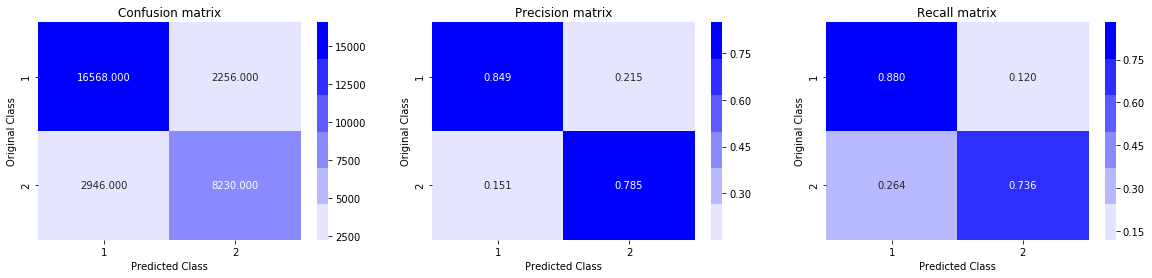

In [33]:
clf = XGBClassifier(n_estimators = best_base_learner, max_depth=best_depth, 
                    learning_rate = best_learning_rate, gamma = best_gamma,
                    random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

predict_y = clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y = clf.predict(X_test)
plot_confusion_matrix(y_test, predicted_y)

## Conclusion:

In [40]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", " log loss"]
x.add_row(["Logistic Regression with TF-IDF", 0.5200])
x.add_row(["Linear SVM with TF-IDF", 0.4896])
x.add_row(["XGBoost with TF-IDF", 0.3358])
x.add_row(["XGBoost(TF-IDF w2v) ", 0.3439])
print(x)


+---------------------------------+-----------+
|              Model              |  log loss |
+---------------------------------+-----------+
| Logistic Regression with TF-IDF |    0.52   |
|      Linear SVM with TF-IDF     |   0.4896  |
|       XGBoost with TF-IDF       |   0.3358  |
|       XGBoost(TF-IDF w2v)       |   0.3439  |
+---------------------------------+-----------+


1.Among all models XGBoost gave the best performace.  
2.The models performs well with TF-IDF than TF-IDF W2VEC vectorizer.